In [2]:
%matplotlib inline
import pandas as pd
import IGtools as igt
import networkx as nx
import os, sys 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

In [3]:
import igraph as ig

In [4]:
def plot_results(x,data,norm=None,label=None,marker='s'):
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.gca()
    if norm==None:
        plt.errorbar(x, np.array(yy), np.array(std_yy), fmt=marker,ms=10,alpha=0.6, label=label);
    else:
        plt.errorbar(x, np.array(yy)/float(norm), np.array(std_yy)/float(norm), fmt=marker,ms=10,alpha=0.6, label=label);
    return;

In [5]:
num_iter = 10;
N = 100;
k_min = 1
k_max = 25
ps = range(k_min,k_max);

In [6]:
from scipy.optimize import fsolve, fmin, root
import sympy as sy
from mis_utils import *

 ## simple example of solution for gaussian degree-distributed networks

In [7]:
N = 100
k_min = 1
k_max = 50
pmin = k_min/float(N);
pmax = k_max/float(N);
psp = range(k_min,k_max,1);

In [8]:
x_p = range(0,11);
p_stars = []
for l in x_p:
    p_stars.append(sy.N(p_star(l,2)[0]));

rhos = []
for i,s in enumerate(x_p):
    rhos.append( rho(s,2,p_stars[i]) )

mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  return np.abs(x - np.power(1 - ((sigma*sigma*np.log(x)+d)/float(d)) * np.exp((d*np.log(x) + 0.5*sigma*sigma*np.power(np.log(x),2))), c-1));
mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(x - np.power(1 - ((sigma*sigma*np.log(x)+d)/float(d)) * np.exp((d*np.log(x) + 0.5*sigma*sigma*np.power(np.log(x),2))), c-1));
/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


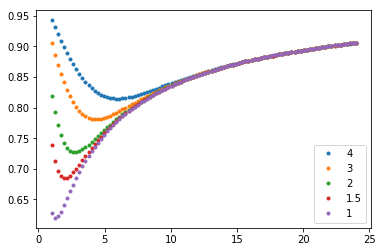

In [9]:
c = 2
pss = np.linspace(ps[0],ps[-1],100)
xs = np.linspace(0,1,5000);
plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 4,c), pss),'.', label = '4')
plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 3,c), pss),'.', label = '3')
plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 2,c), pss),'.', label = '2')
plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 1.5,c), pss),'.', label = '1.5')
plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 1,c), pss),'.', label = '1')
plt.legend(loc=0)

In [10]:
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [11]:
x_p = range(k_min,k_max,1);
p_stars = []
for l in x_p:
    p_stars.append(sy.N(p_star(l,2)[0]));

rhos = []
for i,s in enumerate(x_p):
    rhos.append( rho(s,2,p_stars[i]) )

0.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002


mis_utils.py:7: RuntimeWarning: overflow encountered in double_scalars
  return np.abs(x - np.power(1 - ((sigma*sigma*np.log(x)+d)/float(d)) * np.exp((d*np.log(x) + 0.5*sigma*sigma*np.power(np.log(x),2))), c-1));


1.4000000000000001
1.6
1.8
2.0



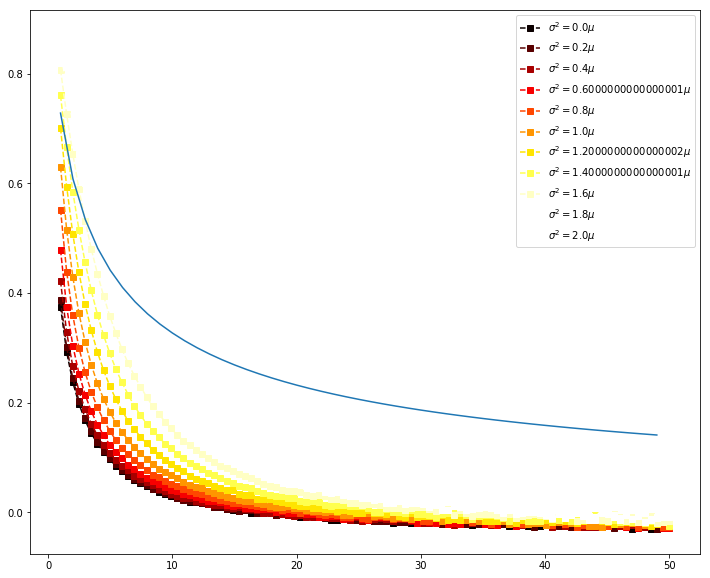

In [12]:
n_sigmas = np.linspace(0,2,11)#range(1,5);
sigmas = {}
pss = np.linspace(k_min,k_max,100)
fig = plt.figure(figsize=(12,10))
for ii,n_sigma in tqdm_notebook(enumerate(n_sigmas)):
    print n_sigma
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    plt.plot(pss, gaussian_prediction(pss, sigmas,xs=np.linspace(0,1,10000)),'--s',color=cmap(ii*30), label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$')
plt.legend(loc=0)

x_p = range(k_min,k_max,1);
p_stars = []
for l in tqdm_notebook(x_p):
    p_stars.append(sy.N(p_star(l,2)[0]));

rhos = []
for i,s in enumerate(x_p):
    rhos.append( rho(s,2,p_stars[i]) )
plt.plot(x_p,rhos,'-')

# Comparison with simulations

In [13]:
n_sigmas_redux = [ 0. ,  0.4, 0.8,  1. ,  1.2,  1.6 ]

In [19]:
num_iter = 20;
N = 50;

res_ig = {};
res_ig_fg = {}
res_ig_fg_v1 = {}
res_ig_fg_v2 = {}
res_ig_fg_clique = {}
res_leaf_branch = {}
res_leaf_core = {}
av_k_ig = {}
n_ig_dict = {}
import time
from datetime import datetime

import igraph as igg

from scipy.stats import norm
xs = np.linspace(0,1,10000)

for n_sigma in tqdm_notebook(n_sigmas_redux):
    print n_sigma;
    res_ig[n_sigma] = {};
    av_k_ig[n_sigma] = {};
    n_ig_dict[n_sigma] = {};

    for l,p in tqdm_notebook(enumerate(pss)):
        print l, '/', len(pss), ':', p, 'started:', str(datetime.now())
        res_ig[n_sigma][p] = []
        av_k_ig[n_sigma][p] = [];
        n_ig_dict[n_sigma][p] = []
        for it in range(num_iter):
            deg = map(lambda x: np.max([0, int(x)]), norm.rvs(p,n_sigma*np.sqrt(p),N));
            if not np.sum(deg)%2==0:
                deg[0]+=1;
            g = nx.configuration_model(deg) # DIRECT generation of the graph 
            av_k_ig[n_sigma][p].append(np.mean(g.degree().values())); # average degree
            n_g = g.number_of_nodes() ## this is the number of nodes, used to normalize the alpha number found below
            n_ig_dict[n_sigma][p].append(n_g); # number of IG nodes (tasks)
            nx.write_gml(g,'test.gml'); #horrible trick to pass from nx to ig
            g_igraph = igg.load('test.gml')
            res_ig[n_sigma][p].append( g_igraph.alpha() / float(n_g) )   # density of the IG MIS (properly normalized)

0.0


0 / 100 : 1.0 started: 2019-10-09 11:09:04.095811
1 / 100 : 1.494949494949495 started: 2019-10-09 11:11:21.387217
2 / 100 : 1.98989898989899 started: 2019-10-09 11:13:37.650513
3 / 100 : 2.484848484848485 started: 2019-10-09 11:15:55.120499
4 / 100 : 2.97979797979798 started: 2019-10-09 11:16:04.669808
5 / 100 : 3.474747474747475 started: 2019-10-09 11:16:14.255653
6 / 100 : 3.9696969696969697 started: 2019-10-09 11:16:19.715041
7 / 100 : 4.464646464646465 started: 2019-10-09 11:16:24.892575
8 / 100 : 4.95959595959596 started: 2019-10-09 11:16:29.083480
9 / 100 : 5.454545454545455 started: 2019-10-09 11:16:33.114489
10 / 100 : 5.94949494949495 started: 2019-10-09 11:16:36.387457
11 / 100 : 6.444444444444445 started: 2019-10-09 11:16:39.674072
12 / 100 : 6.9393939393939394 started: 2019-10-09 11:16:42.535138
13 / 100 : 7.434343434343434 started: 2019-10-09 11:16:45.624483
14 / 100 : 7.92929292929293 started: 2019-10-09 11:16:48.511733
15 / 100 : 8.424242424242426 started: 2019-10-09 11:

0 / 100 : 1.0 started: 2019-10-09 11:18:09.989815
1 / 100 : 1.494949494949495 started: 2019-10-09 11:18:10.127402
2 / 100 : 1.98989898989899 started: 2019-10-09 11:18:12.426003
3 / 100 : 2.484848484848485 started: 2019-10-09 11:18:15.529113
4 / 100 : 2.97979797979798 started: 2019-10-09 11:18:19.308927
5 / 100 : 3.474747474747475 started: 2019-10-09 11:18:23.422528
6 / 100 : 3.9696969696969697 started: 2019-10-09 11:18:27.199173
7 / 100 : 4.464646464646465 started: 2019-10-09 11:18:30.890089
8 / 100 : 4.95959595959596 started: 2019-10-09 11:18:34.456588
9 / 100 : 5.454545454545455 started: 2019-10-09 11:18:37.770528
10 / 100 : 5.94949494949495 started: 2019-10-09 11:18:41.063791
11 / 100 : 6.444444444444445 started: 2019-10-09 11:18:43.975588
12 / 100 : 6.9393939393939394 started: 2019-10-09 11:18:46.919428
13 / 100 : 7.434343434343434 started: 2019-10-09 11:18:49.706272
14 / 100 : 7.92929292929293 started: 2019-10-09 11:18:52.290354
15 / 100 : 8.424242424242426 started: 2019-10-09 11:

0 / 100 : 1.0 started: 2019-10-09 11:20:11.728529
1 / 100 : 1.494949494949495 started: 2019-10-09 11:20:11.783384
2 / 100 : 1.98989898989899 started: 2019-10-09 11:20:11.923073
3 / 100 : 2.484848484848485 started: 2019-10-09 11:20:12.327166
4 / 100 : 2.97979797979798 started: 2019-10-09 11:20:12.983643
5 / 100 : 3.474747474747475 started: 2019-10-09 11:20:14.046496
6 / 100 : 3.9696969696969697 started: 2019-10-09 11:20:15.466418
7 / 100 : 4.464646464646465 started: 2019-10-09 11:20:17.006288
8 / 100 : 4.95959595959596 started: 2019-10-09 11:20:18.679630
9 / 100 : 5.454545454545455 started: 2019-10-09 11:20:20.509653
10 / 100 : 5.94949494949495 started: 2019-10-09 11:20:22.668842
11 / 100 : 6.444444444444445 started: 2019-10-09 11:20:24.666073
12 / 100 : 6.9393939393939394 started: 2019-10-09 11:20:26.382211
13 / 100 : 7.434343434343434 started: 2019-10-09 11:20:28.245468
14 / 100 : 7.92929292929293 started: 2019-10-09 11:20:30.064875
15 / 100 : 8.424242424242426 started: 2019-10-09 11:

0 / 100 : 1.0 started: 2019-10-09 11:21:46.573043
1 / 100 : 1.494949494949495 started: 2019-10-09 11:21:46.630432
2 / 100 : 1.98989898989899 started: 2019-10-09 11:21:46.752897
3 / 100 : 2.484848484848485 started: 2019-10-09 11:21:46.979803
4 / 100 : 2.97979797979798 started: 2019-10-09 11:21:47.418548
5 / 100 : 3.474747474747475 started: 2019-10-09 11:21:47.950905
6 / 100 : 3.9696969696969697 started: 2019-10-09 11:21:48.819954
7 / 100 : 4.464646464646465 started: 2019-10-09 11:21:49.677827
8 / 100 : 4.95959595959596 started: 2019-10-09 11:21:50.793901
9 / 100 : 5.454545454545455 started: 2019-10-09 11:21:52.024457
10 / 100 : 5.94949494949495 started: 2019-10-09 11:21:53.467922
11 / 100 : 6.444444444444445 started: 2019-10-09 11:21:54.938325
12 / 100 : 6.9393939393939394 started: 2019-10-09 11:21:56.244004
13 / 100 : 7.434343434343434 started: 2019-10-09 11:21:57.675291
14 / 100 : 7.92929292929293 started: 2019-10-09 11:21:59.002226
15 / 100 : 8.424242424242426 started: 2019-10-09 11:

0 / 100 : 1.0 started: 2019-10-09 11:23:13.443972
1 / 100 : 1.494949494949495 started: 2019-10-09 11:23:13.505806
2 / 100 : 1.98989898989899 started: 2019-10-09 11:23:13.596283
3 / 100 : 2.484848484848485 started: 2019-10-09 11:23:13.787631
4 / 100 : 2.97979797979798 started: 2019-10-09 11:23:14.014479
5 / 100 : 3.474747474747475 started: 2019-10-09 11:23:14.299840
6 / 100 : 3.9696969696969697 started: 2019-10-09 11:23:14.701629
7 / 100 : 4.464646464646465 started: 2019-10-09 11:23:15.236437
8 / 100 : 4.95959595959596 started: 2019-10-09 11:23:15.828438
9 / 100 : 5.454545454545455 started: 2019-10-09 11:23:16.592366
10 / 100 : 5.94949494949495 started: 2019-10-09 11:23:17.449781
11 / 100 : 6.444444444444445 started: 2019-10-09 11:23:18.427147
12 / 100 : 6.9393939393939394 started: 2019-10-09 11:23:19.471314
13 / 100 : 7.434343434343434 started: 2019-10-09 11:23:20.748472
14 / 100 : 7.92929292929293 started: 2019-10-09 11:23:22.082951
15 / 100 : 8.424242424242426 started: 2019-10-09 11:

0 / 100 : 1.0 started: 2019-10-09 11:24:33.884852
1 / 100 : 1.494949494949495 started: 2019-10-09 11:24:33.944130
2 / 100 : 1.98989898989899 started: 2019-10-09 11:24:34.025932
3 / 100 : 2.484848484848485 started: 2019-10-09 11:24:34.124998
4 / 100 : 2.97979797979798 started: 2019-10-09 11:24:34.258323
5 / 100 : 3.474747474747475 started: 2019-10-09 11:24:34.433068
6 / 100 : 3.9696969696969697 started: 2019-10-09 11:24:34.689432
7 / 100 : 4.464646464646465 started: 2019-10-09 11:24:34.916854
8 / 100 : 4.95959595959596 started: 2019-10-09 11:24:35.317175
9 / 100 : 5.454545454545455 started: 2019-10-09 11:24:35.681138
10 / 100 : 5.94949494949495 started: 2019-10-09 11:24:36.160330
11 / 100 : 6.444444444444445 started: 2019-10-09 11:24:36.649382
12 / 100 : 6.9393939393939394 started: 2019-10-09 11:24:37.304520
13 / 100 : 7.434343434343434 started: 2019-10-09 11:24:37.870628
14 / 100 : 7.92929292929293 started: 2019-10-09 11:24:38.532682
15 / 100 : 8.424242424242426 started: 2019-10-09 11:

In [15]:
cmap = plt.cm.hot
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

0.0
0.4
0.8
1.0
1.2
1.6


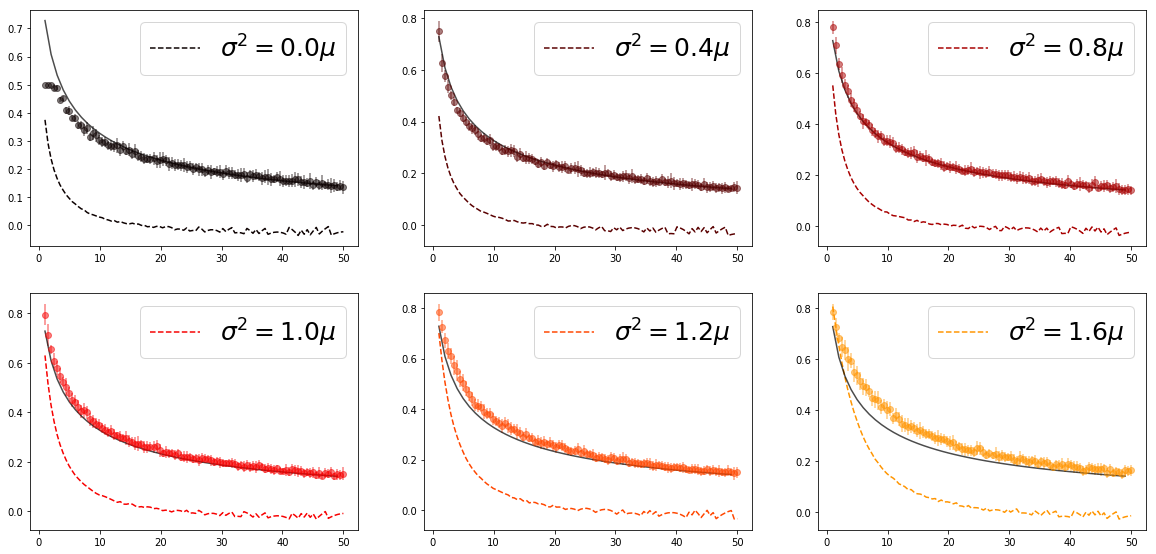

In [21]:
n_sigmas = np.linspace(0,2,11)#range(1,5);
sigmas = {}
pss = np.linspace(k_min,k_max,100)
fig = plt.figure(figsize=(20,20))
preds_df = pd.DataFrame()
for i, n_sigma in enumerate(sorted(res_ig.keys())):
    plt.subplot(4,3,i+1)
    print n_sigma
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.errorbar(pss, yy,std_yy,fmt='o', color=cmap(i*150/len(sorted(res_ig.keys())[1::])),alpha=0.5)
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);

    y = gaussian_prediction(pss, sigmas, xs=np.linspace(0,1,5000));    # theoretical prediction of rho_alpha 
    plt.plot(pss,y,'--k', label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',color=cmap(i*150/len(sorted(res_ig.keys())[1::])))
    preds_df[n_sigma] = pd.Series(y,pss)
    plt.legend(loc=0, fontsize=25)
    plt.plot(x_p,rhos,'-k',alpha=0.7)
#     plt.xlim(0,20)

0.0
0.4
0.8
1.0
1.2
1.6


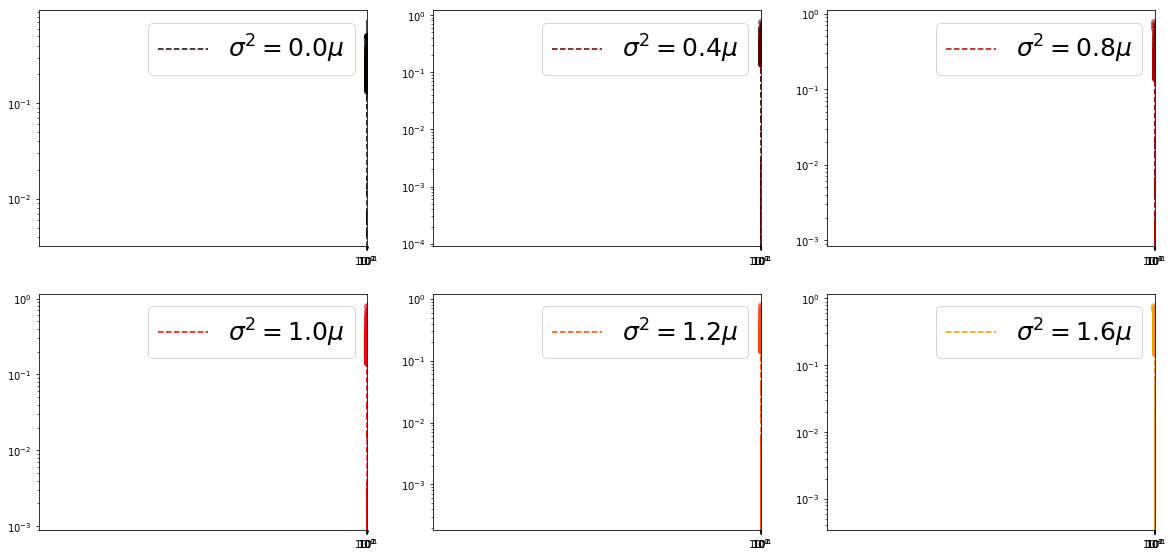

In [22]:
n_sigmas = np.linspace(0,2,11)#range(1,5);
sigmas = {}
pss = np.linspace(k_min,k_max,100)
fig = plt.figure(figsize=(20,20))
preds_df = pd.DataFrame()
for i, n_sigma in enumerate(sorted(res_ig.keys())):
    plt.subplot(4,3,i+1)
    print n_sigma
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.errorbar(pss, yy,std_yy,fmt='o',color=cmap(i*150/len(sorted(res_ig.keys())[1::])),alpha=0.5)
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    y = gaussian_prediction(pss, sigmas,xs=np.linspace(0,1,5000));
    plt.plot(pss,y,'--k', label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',color=cmap(i*150/len(sorted(res_ig.keys())[1::])))
    preds_df[n_sigma] = pd.Series(y,pss)
    plt.legend(loc=0, fontsize=25)

    x_p = range(k_min,k_max,1);
    plt.plot(x_p,rhos,'-k',alpha=0.7)
    plt.xlim(0,20)
    plt.yscale('log')
    plt.xscale('log')
#plt.savefig('../../submission/si/plots/heterogeneity_role.pdf',dpi=600)

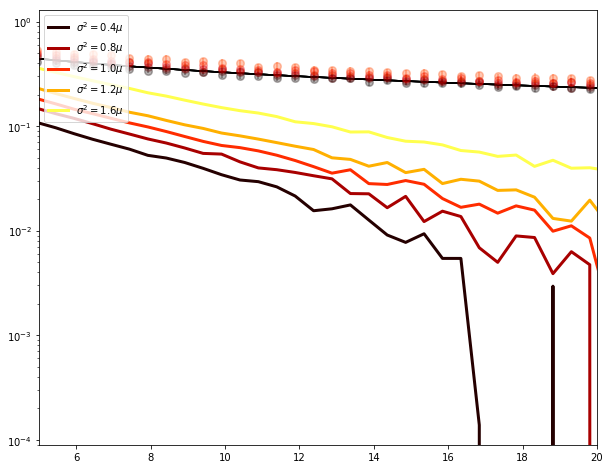

In [23]:
fig = plt.figure(figsize=(10,8))
for i, n_sigma in enumerate(sorted(res_ig.keys())[1::]):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    x_p = range(k_min,k_max,1);
    plt.plot(x_p,rhos,'-k')
    plt.errorbar(pss,yy,std_yy, ms=15,alpha=0.3,color=cmap(i*150/len(sorted(res_ig.keys())[1::])),fmt='.',lw=2,mew=1.5)#,label = n_sigma)
    plt.plot(pss, preds_df[n_sigma],'-',color=cmap(10+i*150/len(sorted(res_ig.keys())[1::2])),
             label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',lw=3)
    plt.legend(loc=2)
plt.xlim(5,20)
plt.yscale('log')
#plt.xscale('log')


In [ ]:
preds_df.plot()

In [ ]:
res_ig_df = {}
for k in sorted(res_ig.keys()):
    res_ig_df[k] = {}
    for p in sorted(res_ig[k].keys()):
        res_ig_df[k][p] = np.nanmean(res_ig[k][p])
res_ig_df = pd.DataFrame(res_ig_df)
res_ig_df.head()

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
for c in res_ig_df.columns:
    plt.plot(res_ig_df[c],'o')
preds_df.plot(ax=ax)
ax = plt.subplot(122)
for c in res_ig_df.T.columns[1::9]:
    plt.plot(res_ig_df.T[c],'o-')
#preds_df.T[pss[1::7]].plot(ax=ax)

In [ ]:
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [ ]:
n_sigmas_redux = sorted(res_ig.keys()[1::])
preds = {}
for i, n_sigma in enumerate(n_sigmas_redux):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    preds[n_sigma] = gaussian_prediction(pss, sigmas,xs=np.linspace(0,1,5000));

In [ ]:
plt.style.use('seaborn-white')
fs = 30
sigmas = {}
fig = plt.figure(figsize=(8,8))
for i, n_sigma in enumerate(sorted(res_ig.keys())[1::2]):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.errorbar(pss,yy,std_yy, ms=30,alpha=0.8,color=cmap(i*250/len(sorted(res_ig.keys())[1::2])),fmt='.',lw=2,mew=1.5,mec='k')#,label = n_sigma)
    plt.plot(pss, preds[n_sigma],'-',color=cmap(i*200/len(sorted(res_ig.keys())[1::2])),
             label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',lw=3)
    plt.legend(loc=0,fontsize=fs)
#x_p = range(k_min,k_max,1);
#plt.plot(x_p,rhos,'--k',lw=3)
plt.xlim(0.5,20)
plt.ylim(0.2,.8)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\langle k \rangle$', fontsize=fs)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.box('off')
plt.grid('off')
plt.tight_layout()
plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects.pdf')
# plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects.eps')
# plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects.svg')

In [ ]:
plt.style.use('seaborn-white')
fs = 30
sigmas = {}
fig = plt.figure(figsize=(8,4))
for i, n_sigma in enumerate(sorted(res_ig.keys())[1::2]):
    sigmas = map(lambda x: n_sigma*np.sqrt(x), pss);
    data = res_ig[n_sigma]
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.errorbar(pss,yy,std_yy, ms=20,alpha=0.8,color=cmap(i*250/len(sorted(res_ig.keys())[1::2])),fmt='.',lw=2,mew=1.5,mec='k')#,label = n_sigma)
    plt.plot(pss, preds[n_sigma],'-',color=cmap(i*250/len(sorted(res_ig.keys())[1::2])),
             label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',lw=3)
#plt.legend(loc=0)
#x_p = range(k_min,k_max,1);
#plt.plot(x_p,rhos,'--k',lw=3)
#plt.xlim(2,20)
#plt.ylim(0.2,1)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\mu$', fontsize=fs)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

#plt.box('off')
plt.grid('off')
plt.tight_layout()
plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects_inset.pdf')
#plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects_inset.eps')
#plt.savefig('../../notes/natphys-submission/plots/heterogeneity-effects_inset.svg')

## Heterogeneity simulations 

In [ ]:
num_iter = 10;
N = 75;

het_res_ig = {};
het_av_k_ig = {}
het_n_ig_dict = {}
import time
from datetime import datetime

import igraph as igg

from scipy.stats import norm
het_sigma = np.linspace(0.2,1.4,10)

for p in [15,20,25,30,35]:
    print p;
    het_res_ig[p] = {};
    het_av_k_ig[p] = {};
    het_n_ig_dict[p] = {};

    for l,sig in enumerate(het_sigma):
        print l, '/', len(het_sigma), ':', sig, 'started:', str(datetime.now())
        het_res_ig[p][sig] = []
        het_av_k_ig[p][sig] = [];
        het_n_ig_dict[p][sig] = []
        for it in range(num_iter):
            deg = map(lambda x: np.max([0, int(x)]), norm.rvs(p,sig*np.sqrt(p),N));
            if not np.sum(deg)%2==0:
                deg[0]+=1;
            g = nx.configuration_model(deg)
            het_av_k_ig[p][sig].append(np.mean(g.degree().values()));
            n_g = g.number_of_nodes()
            het_n_ig_dict[p][sig].append(n_g);
            nx.write_gml(g,'test.gml');
            g_igraph = igg.load('test.gml')
            het_res_ig[p][sig].append( g_igraph.alpha() / float(n_g) )  


In [ ]:
preds_het = {}
for sig in het_sigma:
    preds_het[sig] = []
    sigmas = map(lambda x: np.sqrt(x)*sig, sorted(het_res_ig.keys()));
    preds_het[sig] = pd.Series(gaussian_prediction(sorted(het_res_ig.keys()), sigmas, xs=np.linspace(0,1,10000)), index=sorted(het_res_ig.keys()));

In [ ]:
for p in sorted(het_res_ig.keys()):
    plot_results(het_sigma, het_res_ig[p],label = p)

preds_het_df = pd.DataFrame(preds_het).T
preds_het_df.plot()
#plt.plot(het_sigma,preds_het,label=p)
#plt.legend(loc=0)
#plt.ylim(0,0.7)
#plt.tight_layout()

# Simulation-driven comparison with IG 

In [ ]:
num_iter = 10;
nN = 20;

new_res_ig = {};
new_av_k_ig = {}
new_n_ig_dict = {}
new_gauss_pred = {}

import time
from datetime import datetime

import igraph as igg
new_k_min = 1
new_k_max = 15
new_pmin = new_k_min/float(nN);
new_pmax = new_k_max/float(nN);
precision = 30
new_ps = np.linspace(new_pmin,new_pmax,precision);

from scipy.stats import norm
#rvs(loc=0, scale=1, size=1, random_state=None)

for l,p in enumerate(new_ps):
    print l, '/', precision, ':', p, 'started:', str(datetime.now())
    new_gauss_pred[p] = []
    new_res_ig[p] = []
    new_av_k_ig[p] = [];
    new_n_ig_dict[p] = []
    for it in range(num_iter):
        g = igt.create_ER_bipartite_graph(nN,p)
        lg = igt.line_graph(g)
        ig = igt.interference_graph(lg)
        new_av_k_ig[p].append(np.mean(ig.degree().values()));
        new_n_ig = ig.number_of_nodes()
        new_n_ig_dict[p].append(new_n_ig);
        nx.write_gml(ig,'test.gml');
        g_igraph = igg.load('test.gml')
        new_res_ig[p].append( g_igraph.alpha() )    
        mu = np.mean(g.degree().values());
        sigma =  np.std(g.degree().values());
        p_stars_gauss = minimize_gauss_pstar(xs,mu,sigma**2, 2);
        new_gauss_pred[p].append(rho_gauss(p_stars_gauss, mu , sigma**2,2));

In [ ]:
fs = 30
fig = plt.figure(figsize=(8,8))
data = new_gauss_pred
yy = np.array(map(lambda x: np.mean(data[x]), sorted(data.keys())));
std_yy = np.array(map(lambda x: np.std(data[x]), sorted(data.keys())));
plt.fill_between(new_ps,yy+std_yy,yy-std_yy, alpha=0.3,color=cmap(150), label='Pred. bounds')

data = new_res_ig
yy = map(lambda x: np.mean(data[x])/nN, sorted(data.keys()));
std_yy = map(lambda x: np.std(data[x])/nN, sorted(data.keys()));
plt.errorbar(new_ps,yy,std_yy, ms=20,alpha=0.5,color=cmap(100),fmt='.',lw=2,mew=1.5,mec='k',label = r'Sim $\rho_\alpha$')
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xlabel(r'$\langle k \rangle/N$', fontsize=fs)
plt.box('off')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=0, fontsize=30)
plt.tight_layout()
#plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.eps')
plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.pdf')
#plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.png')
#plt.savefig('../../notes/natphys-submission/plots/IG_sim_vs_solution.svg')

In [ ]:
fs = 15
fig = plt.figure(figsize=(5,4))
data = new_gauss_pred
yy = np.array(map(lambda x: np.mean(data[x]), sorted(data.keys())));
std_yy = np.array(map(lambda x: np.std(data[x]), sorted(data.keys())));
plt.fill_between(new_ps,yy+std_yy,yy-std_yy, alpha=0.3,color=cmap(150))

data = new_res_ig
yy = map(lambda x: np.mean(data[x])/nN, sorted(data.keys()));
std_yy = map(lambda x: np.std(data[x])/nN, sorted(data.keys()));
plt.errorbar(new_ps,yy,std_yy, ms=15,alpha=0.4,color=cmap(100),fmt='.',lw=2,mew=1.5)#,label = n_sigma)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xlabel(r'$z/N$', fontsize=fs)
plt.box('off')
plt.legend(loc=0)
plt.tight_layout()


## Probability of performing $\beta$ tasks from a task set of dimension $\gamma$

$p(\beta ; \gamma) = \binom{\gamma}{\beta} \frac{M_{out}!}{(M_{out} - M_{in})!} M^{-M_{in}} M^{-(\gamma-\beta)} 
\frac{M_{in}! z^{\gamma-\beta}}{(M_{in} - (\gamma-\beta)!}$

In [ ]:
from scipy.special import binom
def log_prob_beta_gamma(beta, gamma, M, zeta):
    s = 0; 
    Min = zeta*beta;
    Mout = M - zeta*beta;
    s += np.log(binom(gamma,beta))
    s += np.sum(map(np.log, range(1,Mout +1 ))) #the plus one is for the range function only, not in the math
    s -= np.sum(map(np.log, range(1,Mout - Min +1 )))
    s -= Min * np.log(M);
    s -= (gamma - beta) * np.log(M/float(zeta));
    s += np.sum(map(np.log, range(1, Min +1)))
    s -= np.sum(map(np.log, range(1, Min -(gamma-beta) +1)))
    return s;
    
def average_beta_gamma(gamma, M, zeta):
    probs = map(lambda x: np.exp(log_prob_beta_gamma(x,gamma, M, zeta)), range(1,gamma+1));
    Z_fun = np.sum(probs);
    s = 0;
    for i, beta in enumerate(range(1,gamma+1)):
        s += beta * probs[i] / Z_fun;
    return s;

In [ ]:
import time

fig = plt.figure(figsize=(12,5))
ns = range(100,400,30);
rhos = np.linspace(0.1,0.9,15) #[0.1,0.2, 0.4, 0.7]

renorm_max_performance  = pd.DataFrame(columns=rhos,index=ns)
max_performance  = pd.DataFrame(columns=rhos,index=ns)

now = time.time();
for rho in rhos:
    print rho, time.time() - now;
    Ms = map(int, np.array(ns)*(np.array(ns)-1)*rho/2);
    ks = 2*np.array(Ms)/np.array(ns)
    alphas = map(int, np.array(gaussian_prediction(ks, map(np.std,ks), xs=np.linspace(0,1,50000))) * ns); 
    avs = map(lambda x: average_beta_gamma(alphas[x],Ms[x],ks[x]), range(len(ns)));
    plt.subplot(121)
    plt.plot(ns, avs, label=str(rho))
    plt.subplot(122)
    plt.plot(ns, avs / np.array(ns), label=str(rho))
    renorm_max_performance[rho] = pd.Series(avs / np.array(ns), ns);
    max_performance[rho] = pd.Series(avs, ns);

plt.subplot(121)
plt.legend(loc=0)
plt.subplot(122)
plt.legend(loc=0)
plt.tight_layout()

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(122)
sns.heatmap(renorm_max_performance, ax=ax);
plt.title('Normalized performance')
ax = plt.subplot(121)
sns.heatmap(max_performance, ax=ax);
plt.title('Raw performance')
plt.tight_layout()


In [ ]:
probs = map(lambda x: log_prob_beta_gamma(x,alphas[5],Ms[5],ks[5]), range(1,alphas[5]));
plt.plot(range(1,alphas[5]), probs,'.')

In [ ]:
no_nodes = 20
prob_link = 0.4
g = nx.erdos_renyi_graph(no_nodes,prob_link)
z = int(np.mean(nx.degree(g).values()))
g = nx.random_regular_graph(z,no_nodes)
M = 2*g.number_of_edges()

alpha = nx.maximal_independent_set(g)
gamma_nodes = range(len(alpha));
print len(alpha), z, int(z)

print average_beta_gamma(len(alpha), M, int(z))

In [ ]:
pb = []
for beta in range(0,g.number_of_nodes()):
    pb.append(np.exp(log_prob_beta_gamma(beta, len(alpha), M, z)))
pb = np.array(pb)/float(np.sum(pb));
plt.plot(range(0,g.number_of_nodes()),pb)
print np.sum(np.array(range(0,g.number_of_nodes()))*pb)

In [ ]:
g = nx.random_regular_graph(10,100)
print np.mean(nx.clustering(g).values())
g = nx.random_regular_graph(20,100)
print np.mean(nx.clustering(g).values())
g = nx.random_regular_graph(30,100)
print np.mean(nx.clustering(g).values())    